<a href="https://colab.research.google.com/github/maurojp/ML_Cancer_de_Mama/blob/master/Breast_Cancer_Wisconsin_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Lineal con Keras usando Dataset para Predicción de Cáncer de Mama**
**Conjunto de datos de Wisconsin (diagnóstico) sobre el cáncer de mama.**
Link del Dataset en Kaggle:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Las columnas en el archivo CSV del Dataset son:
1.   ID
2.   Diagnóstico (B = Benigno, M = Maligno)
3.   Radio medio.
4.   Textura.
5.   Perímetro.
6.   Área.
7.   Suavidad.
8.   Compacidad.
9.   Concavidad.
10.   Puntos Cóncavos.
11.   Simetría.
12.   Dimensión Fractal.








# **Preparamos el entorno**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Seleccionamos Tensorflow 2.0
try:
  # El comando %tensorflow_version solo existe en Colaboratory. Es un MAGIC COMMAND.
  %tensorflow_version 2.x
except Exception:
  pass
from tensorflow import keras
from tensorflow.keras import layers


# **Lectura y Preparación de los Datos**

*Referencia de Pandas*
*   .read_csv() (Lee un archivo csv y carga los datos en un dataframe)
*   .head() (Muestra las 5 primeras filas de un dataframe)
*   .tail() (Muestra las 5 últimas filas de un dataframe)
*   .drop() (Corta filas o columnas del dataframe)
*   .describe() (Devuelve estadísticas del dataframe)





In [0]:
data_frame = pd.read_csv("data.csv", header = 0)

In [4]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data_frame.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**Removemos la primera y ultima columna**

In [0]:
data_frame.drop('id', axis=1, inplace=True)
data_frame.drop('Unnamed: 32', axis=1, inplace=True)

**Cambiamos la columna diagnóstico, 0 = B (Benigno), 1 = M (Maligno)**

In [0]:
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M':1,'B':0})

**Visualización del Dataset y Estadísticas**

In [8]:
print(data_frame)

     diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


In [9]:
data_frame.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Análisis del Dataset**

**Seleccionamos las 10 características que corresponden a la media para realizar una exploración de los datos**

In [0]:
features=list(data_frame.columns[1:11])

**Dividimos el Dataframe según el diagnóstico**

In [0]:
mask = data_frame['diagnosis'] == 1
data_frame_M = data_frame[mask]
data_frame_B = data_frame[~mask]

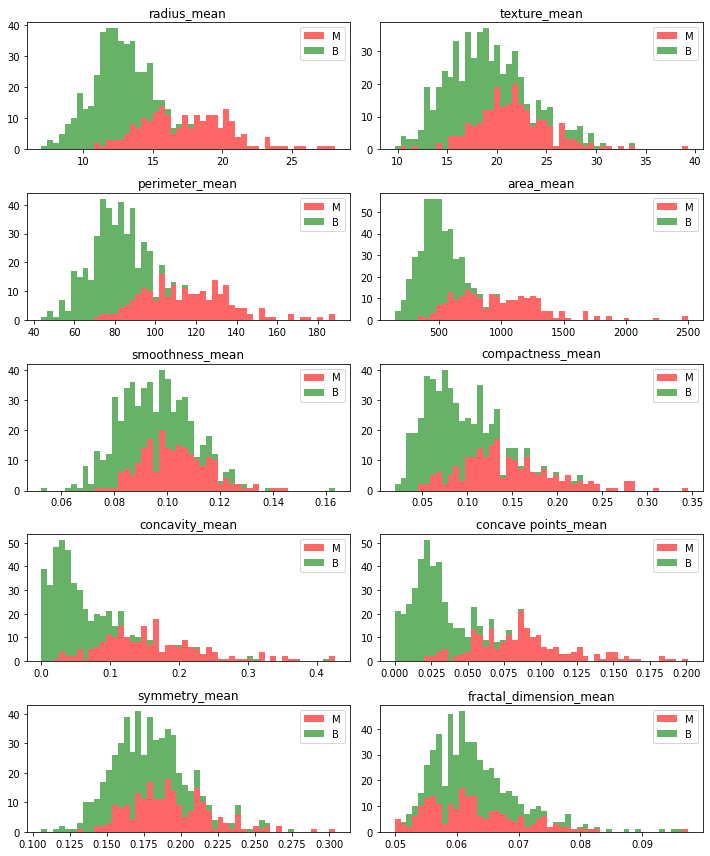

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.hist([data_frame_M[features[idx]],data_frame_B[features[idx]]], bins=50, alpha=0.6, stacked=True, label=['M','B'],color=['r','g'])
  ax.legend(loc='upper right')
  ax.set_title(features[idx])
plt.tight_layout()
plt.show()

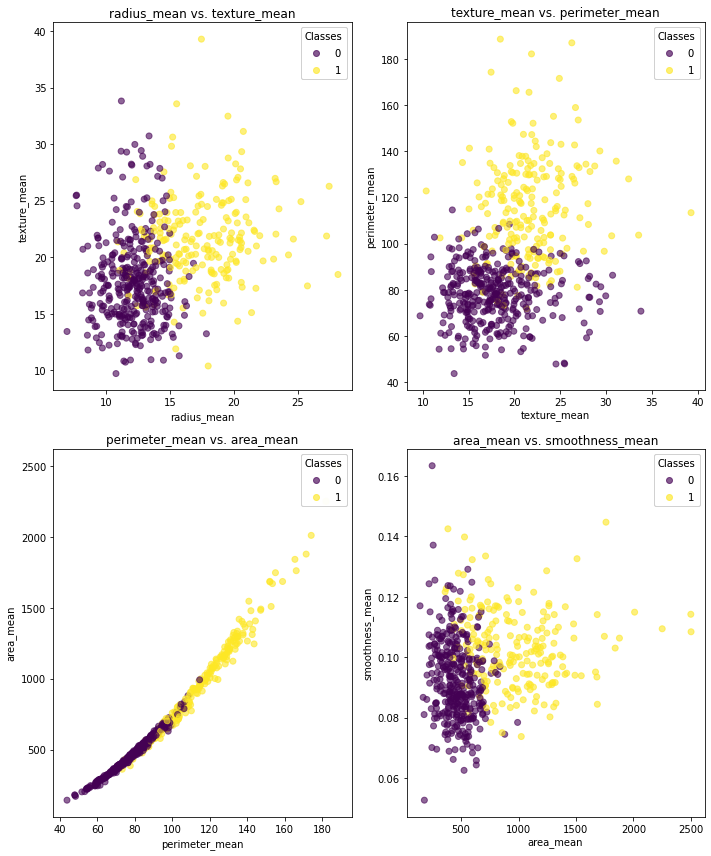

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes = axes.ravel()
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  scatter = ax.scatter(data_frame[features[idx]], data_frame[features[idx+1]], c=data_frame['diagnosis'], alpha=0.6, label=['Color 1', 'Color 2'])
  ax.set_xlabel(features[idx])
  ax.set_ylabel(features[idx+1])
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
  ax.add_artist(legend1)
  ax.set_title(features[idx]+' vs. '+features[idx+1])
plt.tight_layout()
plt.show()

**Balance del Conjunto de Datos**

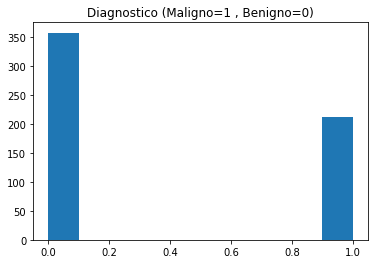

In [14]:
plt.figure().set_facecolor('w')
plt.hist(data_frame['diagnosis'])
plt.title('Diagnostico (Maligno=1 , Benigno=0)')
plt.show()

# **Preparación de los Datos de Entrenamiento y Test**

Seleccionamos las características que usaremos como entradas (X) y la salida esperada (y).

In [0]:
X = data_frame[['radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean']]
y = data_frame['diagnosis']

**Dividimos el Dataset - 70% Train 30% Test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Visualizamos como quedaron los Datasets para Entrenamiento y Test.**

In [17]:
print(X_train, y_train)
print(X_test, y_test)

     radius_mean  area_mean  ...  concavity_mean  concave points_mean
204        12.47      481.9  ...         0.08005             0.038210
387        13.88      596.6  ...         0.02045             0.008507
282        19.40     1145.0  ...         0.16260             0.094640
404        12.34      469.1  ...         0.02109             0.020540
479        16.25      815.8  ...         0.22360             0.091940
..           ...        ...  ...             ...                  ...
215        13.86      578.9  ...         0.09901             0.056020
212        28.11     2499.0  ...         0.32010             0.159500
400        17.91      994.0  ...         0.31890             0.119800
521        24.63     1841.0  ...         0.23100             0.147100
438        13.85      592.6  ...         0.01342             0.022930

[398 rows x 5 columns] 204    0
387    0
282    1
404    0
479    1
      ..
215    1
212    1
400    1
521    1
438    0
Name: diagnosis, Length: 398, dtype: 

# **Implementación del modelo**

In [0]:
model = keras.Sequential()
model.add(layers.Dense(1, input_dim = 5, kernel_initializer='zeros'))
model.add(layers.Activation('sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(0.00005), loss='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [0]:
fit_history = model.fit(X_train.values, y_train.values, validation_data=(X_test, y_test), epochs = 150, batch_size=199)

Epoch 1/150
2/2 [==============================] - 0s 96ms/step - loss: 0.6922 - accuracy: 0.5201 - val_loss: 0.6890 - val_accuracy: 0.3860
Epoch 2/150
2/2 [==============================] - 0s 25ms/step - loss: 0.6895 - accuracy: 0.3668 - val_loss: 0.6859 - val_accuracy: 0.3860
Epoch 3/150
2/2 [==============================] - 0s 22ms/step - loss: 0.6875 - accuracy: 0.3668 - val_loss: 0.6838 - val_accuracy: 0.3860
Epoch 4/150
2/2 [==============================] - 0s 21ms/step - loss: 0.6860 - accuracy: 0.3668 - val_loss: 0.6827 - val_accuracy: 0.3860
Epoch 5/150
2/2 [==============================] - 0s 22ms/step - loss: 0.6854 - accuracy: 0.3668 - val_loss: 0.6817 - val_accuracy: 0.3860
Epoch 6/150
2/2 [==============================] - 0s 23ms/step - loss: 0.6844 - accuracy: 0.3668 - val_loss: 0.6808 - val_accuracy: 0.3860
Epoch 7/150
2/2 [==============================] - 0s 23ms/step - loss: 0.6837 - accuracy: 0.3668 - val_loss: 0.6799 - val_accuracy: 0.3860
Epoch 8/150
2/2 [===

# **Gráficas de Precisión y Perdida**

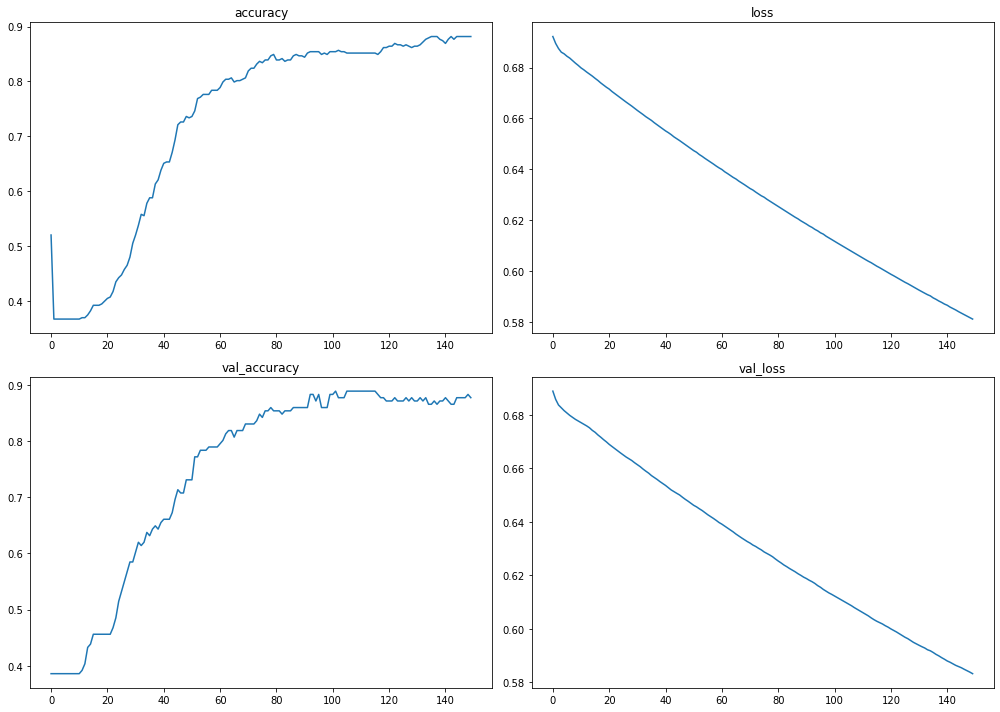

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.ravel()
outputs = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
fig.set_facecolor('w')
for idx,ax in enumerate(axes):
  ax.plot(fit_history.history[outputs[idx]])
  ax.set_title(outputs[idx])
plt.tight_layout()
plt.show()

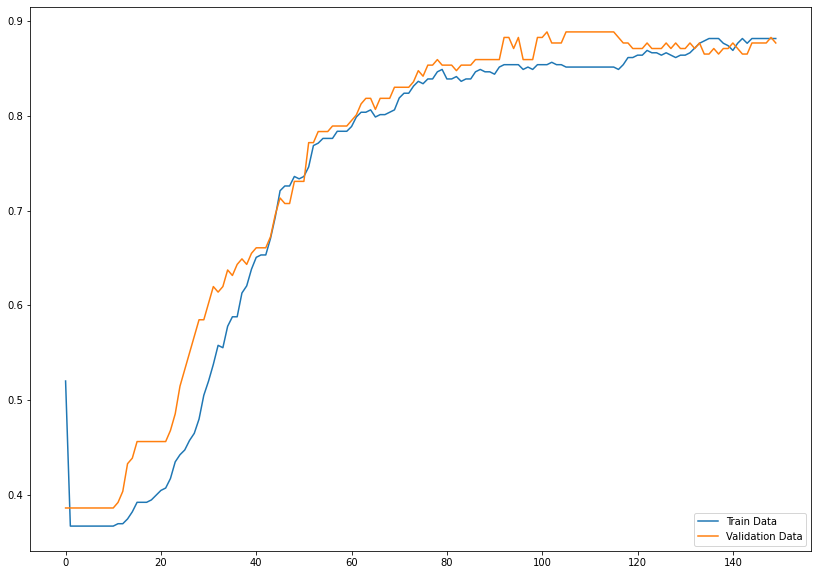

In [0]:
plt.figure(figsize=(14,10), facecolor='w')
plt.plot(fit_history.history['accuracy'], label='Train Data')
plt.plot(fit_history.history['val_accuracy'], label='Validation Data')
plt.legend()
plt.legend(loc='lower right')

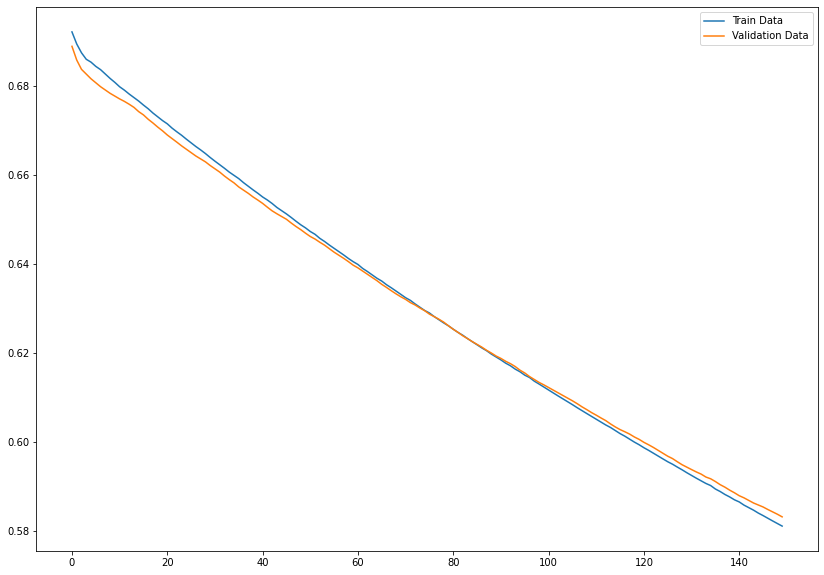

In [0]:
plt.figure(figsize=(14,10))
plt.plot(fit_history.history['loss'], label='Train Data')
plt.plot(fit_history.history['val_loss'], label='Validation Data')
plt.legend()
plt.legend(loc='upper right')

# **Evaluamos el modelo con los conjuntos de Datos de Entrenamiento y Test**

In [0]:
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.8819


[0.5800576210021973, 0.8819095492362976]

In [0]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.8772


[0.5822798013687134, 0.8771929740905762]